In [ ]:
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install folium
!pip install plotly_express

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6 python3-rtree
0 upgraded, 4 newly installed, 0 to remove and 15 not upgraded.
Need to get 365 kB of archives.
After this operation, 1,799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('dataset_cleaned_25Nov.csv')
df.head()

,id,name,lat,lng,vicinity,kecamatan,kabupaten,rating,user_ratings_total,price,...,jenis_tenis,jenis_voli,jenis_futsal,jenis_basket,fasilitas_wifi,fasilitas_parkir_motor,fasilitas_parkir_mobil,fasilitas_wc,fasilitas_kantin,fasilitas_mushola
0,F142,Bardosono Futsal,-7.781900,110.351240,"Jl. Kyai Mojo No.117, Bener, Kota Yogyakarta",Bener,Yogyakarta,4.0,69,60000,...,0,0,1,0,0,1,1,1,0,1
1,F887,Bardosono Happy Futsal,-7.807485,110.389852,"59VQ+2W4, Jl. Prof. DR. Soepomo Sh, Warungboto...",Warungboto,Yogyakarta,4.4,709,65000,...,0,0,1,0,0,1,1,1,1,1
2,F872,Empat R Futsal,-7.825869,110.367686,"Jl. Parangtritis No.161, Brontokusuman, Kota Y...",Brontokusuman,Yogyakarta,4.4,707,65000,...,0,0,1,0,1,1,1,1,1,1
3,F940,Futsal Jogokaryan,-7.824230,110.366976,"Jl. Jogokaryan No.65, Mantrijeron, Kota Yogyak...",Mantrijeron,Yogyakarta,4.5,1020,68000,...,0,0,1,0,0,1,1,1,1,1
4,C106,Gor Badminton Tompeyan,-7.784648,110.354773,"Jl. Tompeyan No.161, Tegalrejo, Kota Yogyakarta",Tegalrejo,Yogyakarta,4.5,79,70000,...,0,0,0,0,0,1,1,1,1,1


In [ ]:
df.shape

(818, 22)

In [ ]:
df_sepakbola = df.loc[df.jenis_sepakbola == 1]
df_sepakbola

,id,name,lat,lng,vicinity,kecamatan,kabupaten,rating,user_ratings_total,price,...,jenis_tenis,jenis_voli,jenis_futsal,jenis_basket,fasilitas_wifi,fasilitas_parkir_motor,fasilitas_parkir_mobil,fasilitas_wc,fasilitas_kantin,fasilitas_mushola
15,S97,Lapangan Karang Kota Gede,-7.822980,110.396604,"Jl. Nyi Pembayun, Prenggan, Kota Yogyakarta",Prenggan,Yogyakarta,4.3,2648,80000,...,0,0,0,0,0,1,1,1,1,1
16,S286,Lapangan Mancasan,-7.805153,110.352816,"Jl. Kresno, Wirobrajan, Kota Yogyakarta",Wirobrajan,Yogyakarta,4.4,954,70000,...,0,0,0,0,0,1,1,1,0,1
17,S40,Lapangan Pp Ali Maksum Krapyak,-7.824392,110.361300,"Jl. Jogokaryan No.12 B, Mantrijeron, Kota Yogy...",Mantrijeron,Yogyakarta,4.8,30,75000,...,0,0,0,0,0,1,0,1,0,0
19,S988,Lapangan Sidokabul,-7.820309,110.379886,"59HH+VXC, Lapangan Jl. Sidokabul, Sorosutan, K...",Sorosutan,Yogyakarta,4.6,488,80000,...,0,0,0,0,0,1,1,1,1,1
26,S953,Minggiran Field,-7.819418,110.360957,"Suryodiningratan, Mantrijeron, Jl. Minggiran B...",Suryodiningratan,Yogyakarta,4.4,1749,80000,...,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,S245,Lapangan Jurug,-7.907029,110.225989,"36VG+59Q, Unnamed Road, Jurug, Sidorejo, Kabup...",Sidorejo,Kulon Progo,4.0,2,57000,...,0,0,0,0,0,0,0,0,0,1
810,S389,Mdl Futsal,-7.808899,110.192999,"55RV+C5X, Bandung, Donomulyo, Wareng, Donomuly...",Donomulyo,Kulon Progo,0.0,0,30000,...,0,0,0,0,0,1,1,1,1,1
811,S177,Jersey Printing Jogja,-7.834005,110.220372,"Jl. Wates No.km 17, RT.21/RW.11, Sentolo Kidul...",Sentolo,Kulon Progo,4.9,641,84000,...,0,0,0,0,0,1,0,1,0,1
816,S626,Js Sport Nanggulan,-7.771835,110.210965,"66H6+798, Janti 11, Jati Sarono, Kabupaten Kul...",Jati Sarono,Kulon Progo,5.0,1,82000,...,0,0,0,0,1,0,0,1,0,1


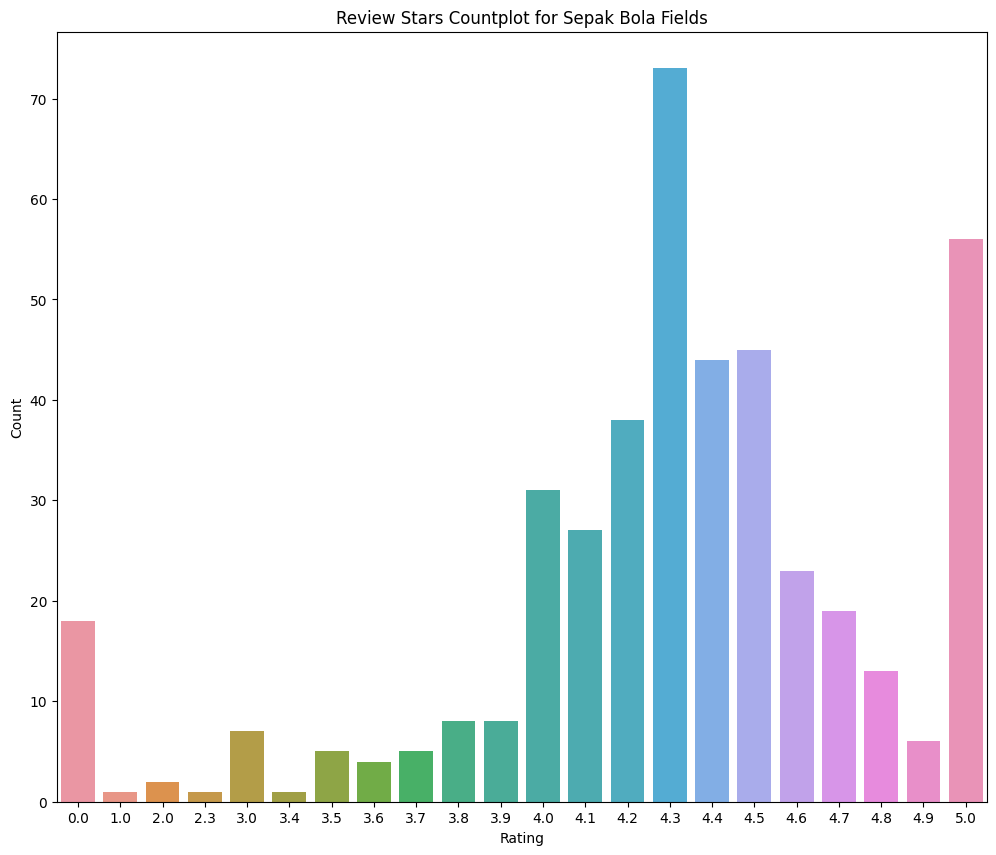

In [ ]:
plt.figure(figsize=(12, 10))
sns.barplot(x=df_sepakbola['rating'].value_counts().index, y=df_sepakbola['rating'].value_counts())
plt.title('Review Stars Countplot for Sepak Bola Fields')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
df_sepakbola.columns

Index(['id', 'name', 'lat', 'lng', 'vicinity', 'kecamatan', 'kabupaten',
       'rating', 'user_ratings_total', 'price', 'jenis_sepakbola',
       'jenis_badminton', 'jenis_tenis', 'jenis_voli', 'jenis_futsal',
       'jenis_basket', 'fasilitas_wifi', 'fasilitas_parkir_motor',
       'fasilitas_parkir_mobil', 'fasilitas_wc', 'fasilitas_kantin',
       'fasilitas_mushola'],
      dtype='object')

In [ ]:
top_sepakbola = df_sepakbola.sort_values(by=['user_ratings_total', 'rating'], ascending=False)
top_sepakbola.head()

,id,name,lat,lng,vicinity,kecamatan,kabupaten,rating,user_ratings_total,price,...,jenis_tenis,jenis_voli,jenis_futsal,jenis_basket,fasilitas_wifi,fasilitas_parkir_motor,fasilitas_parkir_mobil,fasilitas_wc,fasilitas_kantin,fasilitas_mushola
15,S97,Lapangan Karang Kota Gede,-7.822980,110.396604,"Jl. Nyi Pembayun, Prenggan, Kota Yogyakarta",Prenggan,Yogyakarta,4.3,2648,80000,...,0,0,0,0,0,1,1,1,1,1
26,S953,Minggiran Field,-7.819418,110.360957,"Suryodiningratan, Mantrijeron, Jl. Minggiran B...",Suryodiningratan,Yogyakarta,4.4,1749,80000,...,0,0,0,0,0,1,1,1,1,1
472,S220,Lapangan Gesikan Wijirejo Pandak Bantul,-7.900621,110.297970,"37XX+Q55, Gesikan I, Wijirejo, Bantul Regency",Wijirejo,Bantul,4.3,1610,57000,...,0,0,0,0,0,0,1,0,1,0
497,S326,Dwi Windu Stadium,-7.880494,110.331372,"Jl. Jend. Sudirman No.1, Babadan, Bantul, Kabu...",Bantul,Bantul,4.2,976,63000,...,0,0,0,0,0,1,1,1,1,1
16,S286,Lapangan Mancasan,-7.805153,110.352816,"Jl. Kresno, Wirobrajan, Kota Yogyakarta",Wirobrajan,Yogyakarta,4.4,954,70000,...,0,0,0,0,0,1,1,1,0,1


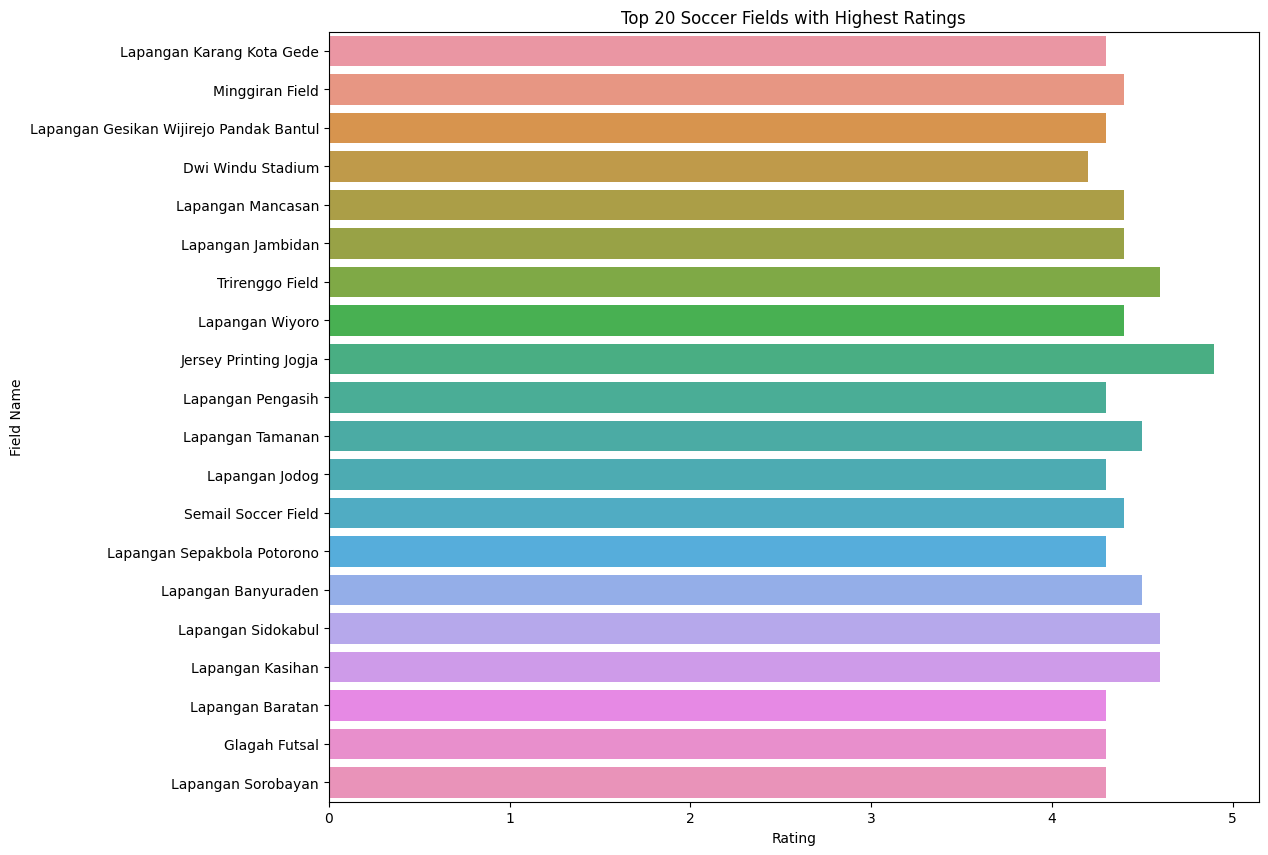

In [ ]:
# 20 top rows
top20_sepakbola = top_sepakbola.head(20)

# Create the bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x='rating', y='name', data=top20_sepakbola)
plt.title('Top 20 Soccer Fields with Highest Ratings')
plt.xlabel('Rating')
plt.ylabel('Field Name')
plt.show()

In [ ]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
#configure_plotly_browser_state()
px.scatter_mapbox(df_sepakbola, lat="lat", lon="lng", color="rating", size='user_ratings_total' ,
                   size_max=30, zoom=3, width=1200, height=800)

In [ ]:
Bantul = df_sepakbola[df_sepakbola.kabupaten == 'Bantul']
px.scatter_mapbox(Bantul, lat='lat', lon='lng', color='rating', size='user_ratings_total',
                  size_max=15, zoom=10, width=1200, height=800)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

In [ ]:
coordinates = Bantul[['lng', 'lat']]

distortions = []
K = range(1,25)
for k in K:
  kmeansModel = KMeans(n_clusters=k)
  kmeansModel = kmeansModel.fit(coordinates)
  distortions.append(kmeansModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

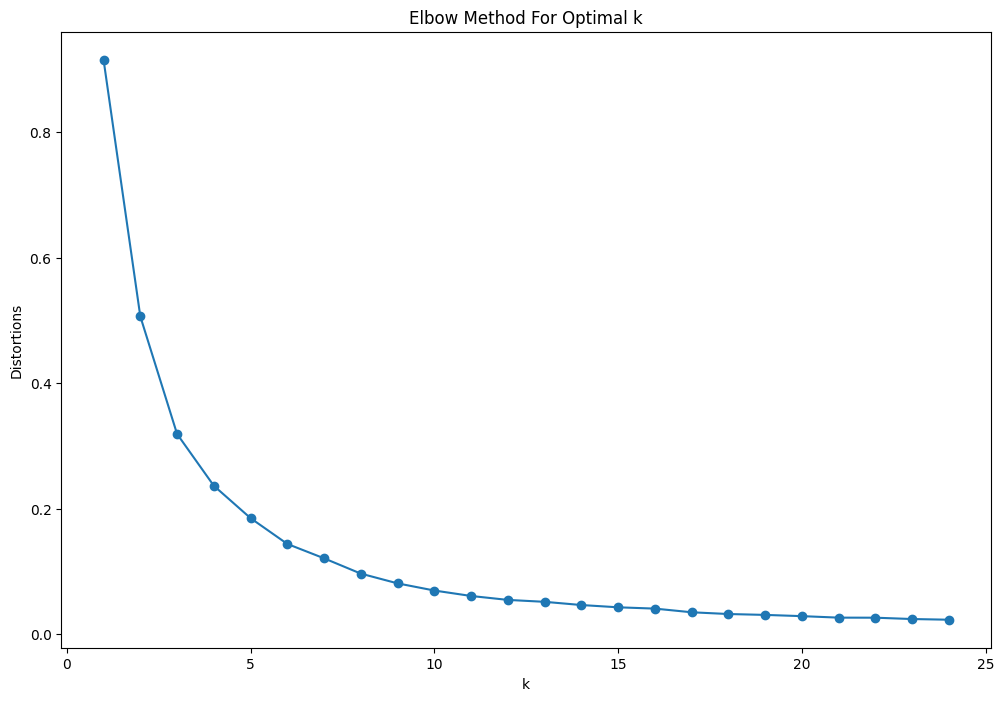

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(coordinates)
  labels = kmeans.labels_
  sil.append(silhouette_score(coordinates, labels, metric = 'euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
sil

[0.3725864484178134,
 0.39268883940744037,
 0.3975562334540705,
 0.39926805829762035,
 0.41247521701216866,
 0.4125060904606285,
 0.4293869479672356,
 0.4178542891148614,
 0.4342011485639345,
 0.4352035387109839,
 0.4342918513105744,
 0.42405179099703755,
 0.4189098076659693,
 0.41376766206164994,
 0.4206886883020054,
 0.40338647206749556,
 0.4208372144093232,
 0.4056152723250558,
 0.41549826836855397,
 0.38810560312806414,
 0.39425768505113706,
 0.39544095316519406,
 0.3814303930560111,
 0.39622827675636274,
 0.3917162928466315,
 0.37053792408048014,
 0.3812763819180456,
 0.3862806606031946,
 0.3703140112630053,
 0.3818289835375434,
 0.3755758525144936,
 0.3732244944374452,
 0.3656089167166041,
 0.39917775813153467,
 0.3938765344864867,
 0.39062722540586664,
 0.4001515961875864,
 0.41481410281735925,
 0.3838403598032786,
 0.3983546870896768,
 0.428897054168322,
 0.410619029973417,
 0.4135411379097169,
 0.4014432256591423,
 0.4104358938884634,
 0.41597773295346063,
 0.4093574116447726,

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coordinates)
y = kmeans.labels_
print("k = 5", " silhouette_score ", silhouette_score(coordinates, y, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



k = 5  silhouette_score  0.3895518220171338


In [ ]:
# scaler = StandardScaler()
# coordinates_normalized = scaler.fit_transform(Bantul[['lng', 'lat']])

In [ ]:
# Bantul['cluster'] = kmeans.predict(coordinates_normalized)
# Bantul.head()
Bantul['cluster'] = kmeans.predict(Bantul[['lng', 'lat']])
Bantul.head()

<ipython-input-19-32783905c789>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,name,lat,lng,vicinity,kecamatan,kabupaten,rating,user_ratings_total,price,...,jenis_voli,jenis_futsal,jenis_basket,fasilitas_wifi,fasilitas_parkir_motor,fasilitas_parkir_mobil,fasilitas_wc,fasilitas_kantin,fasilitas_mushola,cluster
84,S8,Lapangan Dasawarsa Kadipiro,-7.798682,110.347518,"682X+G2C, Kdipiro, Ngestiharjo, Bantul Regency",Ngestiharjo,Bantul,4.3,262,65000,...,0,0,0,0,1,1,1,1,1,3
413,S467,Lapangan Tegalombo,-7.934011,110.249955,"368X+9XW, Greso, Trimurti, Kabupaten Bantul",Trimurti,Bantul,4.5,37,71000,...,0,0,0,0,0,0,0,0,1,0
415,S710,Lapangan Poncosari,-7.960125,110.237275,"26QP+WWR, Singgelo, Singgoto, Poncosari, Kabup...",Poncosari,Bantul,4.3,171,68000,...,0,0,0,1,0,1,1,1,0,0
417,S765,Lapangan Kedungbule,-7.941565,110.245040,"Kedungbule, Trimurti, Bantul Regency",Trimurti,Bantul,4.5,142,75000,...,0,0,0,0,0,1,0,1,0,0
418,S270,Lapangan Bendo,-7.928186,110.251695,"Jl. Kp. Bendo Mangiran, Bendo, Trimurti, Kabup...",Trimurti,Bantul,4.3,104,63000,...,0,0,0,1,1,1,0,1,1,0


In [ ]:
px.scatter_mapbox(Bantul, lat='lat', lon='lng', color='cluster', size='user_ratings_total',
                  hover_data=['name', 'lng', 'lat'], zoom=10, width=1200, height=800)

In [ ]:
y_onehot = pd.get_dummies(Bantul['cluster'])

In [ ]:
px.scatter_mapbox(Bantul, lat='lat', lon='lng', color='cluster', size='user_ratings_total',
                  hover_data=['name', 'lng', 'lat'], zoom=10, width=1200, height=800)

In [ ]:
def build_recommendation_model(X_train, y_train, input_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=input_dim))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))

    model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=20, batch_size=32)

    return model

In [ ]:
def recommend_sepakbola_neural(df, model, lng, lat):
    user_location_normalized = np.array([lng, lat]).reshape(1, -1)
    predicted_probabilities = model.predict(user_location_normalized)

    # Ambil indeks dengan nilai probabilitas tertinggi sebagai cluster
    predicted_cluster = np.argmax(predicted_probabilities)

    print("Predicted Cluster:", predicted_cluster)

    return df[df['cluster'] == predicted_cluster].iloc[0:5][['name', 'lng', 'lat']]

In [ ]:
top_sepakbola_Bantul = Bantul.sort_values(by=['user_ratings_total', 'rating'], ascending=False)
top_sepakbola_Bantul

,id,name,lat,lng,vicinity,kecamatan,kabupaten,rating,user_ratings_total,price,...,jenis_voli,jenis_futsal,jenis_basket,fasilitas_wifi,fasilitas_parkir_motor,fasilitas_parkir_mobil,fasilitas_wc,fasilitas_kantin,fasilitas_mushola,cluster
472,S220,Lapangan Gesikan Wijirejo Pandak Bantul,-7.900621,110.297970,"37XX+Q55, Gesikan I, Wijirejo, Bantul Regency",Wijirejo,Bantul,4.3,1610,57000,...,0,0,0,0,0,1,0,1,0,4
497,S326,Dwi Windu Stadium,-7.880494,110.331372,"Jl. Jend. Sudirman No.1, Babadan, Bantul, Kabu...",Bantul,Bantul,4.2,976,63000,...,0,0,0,0,1,1,1,1,1,4
543,S900,Lapangan Jambidan,-7.851670,110.410176,"Bintaran, Jambidan, Bantul Regency",Jambidan,Bantul,4.4,903,71000,...,0,0,0,0,1,0,1,0,0,3
490,S701,Trirenggo Field,-7.898584,110.340300,"Lapangan, Area Sawah, Trirenggo, Kabupaten Bantul",Trirenggo,Bantul,4.6,889,80000,...,0,0,0,1,1,0,1,0,1,4
571,S781,Lapangan Wiyoro,-7.823132,110.415206,"Jl. Wiyoro Kidul No.1 Bumen Kulon, Wiyoro, Bat...",Baturetno,Bantul,4.4,745,80000,...,0,0,0,0,1,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,S806,Lapangan Olah Raga Perum Bmw Perumahan Bumi Ma...,-7.844510,110.404486,"5C43+5QX, Jl. Bumi Mandiri Wirokerten, Glondon...",Wirokerten,Bantul,5.0,1,85000,...,0,0,0,0,1,0,0,1,1,3
437,S569,Gelora Pervoda,-7.977463,110.261940,"27F6+2Q8, Daleman, Gadingharjo, Kabupaten Bantul",Gadingharjo,Bantul,4.0,1,42000,...,0,0,0,1,1,0,1,1,1,0
496,S361,Lapangan Nogosari Rt,-7.898080,110.341719,"482R+VP2, Jl. Wijaya Kusuma, Nogosari, Trireng...",Trirenggo,Bantul,4.0,1,42000,...,0,0,0,1,0,0,1,1,1,4
552,S723,Lapangan Tamiya Tobratan,-7.860488,110.400051,"4CQ2+R23, Wirokerten, Bantul Regency",Wirokerten,Bantul,4.0,1,42000,...,0,0,0,1,1,0,0,1,1,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(coordinates, y_onehot, test_size=0.2, random_state=42)

In [ ]:
model = build_recommendation_model(X_train, y_train, input_dim=2)

Epoch 1/20
4/4 [==============================] - 9s 12ms/step - loss: 9.3604 - accuracy: 0.1800
Epoch 2/20
4/4 [==============================] - 0s 8ms/step - loss: 3.1731 - accuracy: 0.1600
Epoch 3/20
4/4 [==============================] - 0s 7ms/step - loss: 2.6426 - accuracy: 0.2700
Epoch 4/20
4/4 [==============================] - 0s 6ms/step - loss: 1.8931 - accuracy: 0.2800
Epoch 5/20
4/4 [==============================] - 0s 7ms/step - loss: 1.7925 - accuracy: 0.1600
Epoch 6/20
4/4 [==============================] - 0s 6ms/step - loss: 1.6666 - accuracy: 0.1900
Epoch 7/20
4/4 [==============================] - 0s 6ms/step - loss: 1.8452 - accuracy: 0.1300
Epoch 8/20
4/4 [==============================] - 0s 7ms/step - loss: 1.7292 - accuracy: 0.2700
Epoch 9/20
4/4 [==============================] - 0s 8ms/step - loss: 1.7608 - accuracy: 0.2700
Epoch 10/20
4/4 [==============================] - 0s 6ms/step - loss: 1.7346 - accuracy: 0.1900
Epoch 11/20
4/4 [=====================

In [ ]:
recommendations = recommend_sepakbola_neural(top_sepakbola_Bantul, model, 110.29756727083978, -7.899984491453857)
print(recommendations)

1/1 [==============================] - 0s 192ms/step
Predicted Cluster: 4
                                        name         lng       lat
472  Lapangan Gesikan Wijirejo Pandak Bantul  110.297970 -7.900621
497                        Dwi Windu Stadium  110.331372 -7.880494
490                          Trirenggo Field  110.340300 -7.898584
477                           Lapangan Jodog  110.313436 -7.906265
473           Lapangan Dwi Sapta Ringinharjo  110.317770 -7.885379


In [ ]:
test_loc = {
    'user' : [1, 2],
    'lat' : [-7.899984491453857, -7.738167949473871],
    'lng' : [110.29756727083978, 110.25621181835716]
}

test_df = pd.DataFrame(test_loc)
test_df

,user,lat,lng
0,1,-7.899984,110.297567
1,2,-7.738168,110.256212


In [ ]:
user1 = test_df[test_df['user'] == 1]
user1

,user,lat,lng
0,1,-7.899984,110.297567


In [ ]:
fig = px.scatter_mapbox(recommend_sepakbola_neural(top_sepakbola_Bantul, model, user1.lng, user1.lat),
                        lat='lat', lon='lng', zoom=10, width=1200, height=800,
                        hover_data=['name', 'lat', 'lng'])
fig.add_scattermapbox(lat=user1['lat'], lon=user1['lng']).update_traces(dict(mode='markers', marker=dict(size=15)))

1/1 [==============================] - 0s 60ms/step
Predicted Cluster: 4


In [ ]:
model.save('coba2-tensorflow-user-loc-rate.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Save the TFLite model to a file
with open('coba2-tensorflow-user-loc-rate.tflite', 'wb') as f:
    f.write(tflite_model)